### Project UAS Background Removal

#### Putu Niar Meiwasandi (202131018)
#### Pengolahan Citra Kelas A

### Import Library


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Read Image

(1250, 1534, 3)


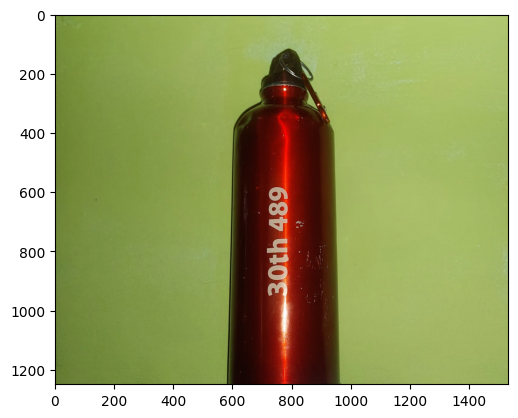

In [2]:
img = cv2.imread('Original Image.jpg').astype(np.uint8)
print(img.shape)
plt.imshow(img, cmap='gray')

### Convert BGR to RGB

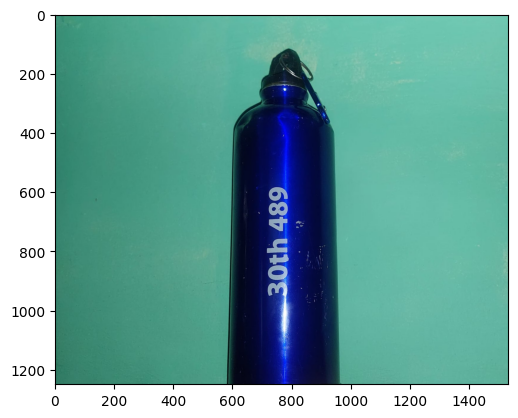

In [3]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap='gray')

### Get Countours

In [4]:
gray = (cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)).astype(np.uint8)
ret,thresh = cv2.threshold(gray, int(image[:, :, 0].mean()), int(image[:, :, 1].mean()), 0)

In [5]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


### Create Mask

In [6]:
mask = np.zeros(shape=(gray.shape), dtype=np.uint8)
cv2.drawContours(mask, contours, -1, (1,0,0), cv2.FILLED)   
mask = (~(mask == 1) * 1).astype(np.uint8)

### Cut Off Background

In [7]:
output = cv2.bitwise_and(image, image, mask=mask)

### Show Image

Text(0.5, 1.0, 'Output')

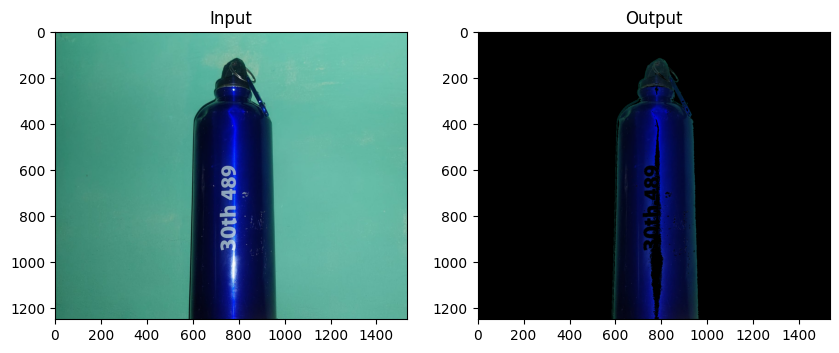

In [8]:
fig, axes = plt.subplots(1,2, figsize=(10,10))
ax = axes.ravel()

ax[0].imshow(image, cmap = 'gray')
ax[0].set_title("Input")

ax[1].imshow(output, cmap = 'gray')
ax[1].set_title("Output")

### Save Image

In [9]:
cv2.imwrite('Output Image.png', output)

True